In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Health_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       499 non-null    int64  
 1   sex       499 non-null    object 
 2   bmi       499 non-null    float64
 3   children  499 non-null    int64  
 4   smoker    499 non-null    object 
 5   region    499 non-null    object 
 6   charges   499 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 27.4+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.count

<bound method DataFrame.count of      age     sex     bmi  children smoker     region      charges
0     19  female  27.900         0    yes  southwest  16884.92400
1     18    male  33.770         1     no  southeast   1725.55230
2     28    male  33.000         3     no  southeast   4449.46200
3     33    male  22.705         0     no  northwest  21984.47061
4     32    male  28.880         0     no  northwest   3866.85520
..   ...     ...     ...       ...    ...        ...          ...
494   21    male  25.700         4    yes  southwest  17942.10600
495   20    male  27.930         0     no  northeast   1967.02270
496   31  female  23.600         2     no  southwest   4931.64700
497   45    male  28.700         2     no  southwest   8027.96800
498   44  female  23.980         2     no  southeast   8211.10020

[499 rows x 7 columns]>

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
x=df.iloc[:,1:-1].values #convert df into numpy array
y=df.iloc[:,-1].values

In [11]:
le=LabelEncoder()
# Assuming 'region' is the column you want to encode
df['region'] = le.fit_transform(df['region'])
#fit: calculation/formula
#transform: applying calculation on data

In [12]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,39.476954,0.507014,30.581393,1.086172,0.208417,1.521042,13321.868848
std,14.602806,0.500453,5.845924,1.218412,0.406584,1.107232,12004.513284
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,26.000000,0.000000,26.600000,0.000000,0.000000,1.000000,4687.092850
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9617.662450
75%,53.000000,1.000000,34.415000,2.000000,0.000000,2.000000,17132.394800
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [16]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.054863,0.138556,0.079960,-0.003248,-0.040488,0.347274
sex,-0.054863,1.000000,0.041647,0.003947,0.111225,-0.006609,0.089065
bmi,0.138556,0.041647,1.000000,0.049857,-0.025374,0.117516,0.174759
children,0.079960,0.003947,0.049857,1.000000,-0.007953,-0.027395,0.048437
smoker,-0.003248,0.111225,-0.025374,-0.007953,1.000000,0.008081,0.778521
region,-0.040488,-0.006609,0.117516,-0.027395,0.008081,1.000000,-0.007017
charges,0.347274,0.089065,0.174759,0.048437,0.778521,-0.007017,1.000000


In [17]:
df.shape

(499, 7)

In [18]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='bmi'>

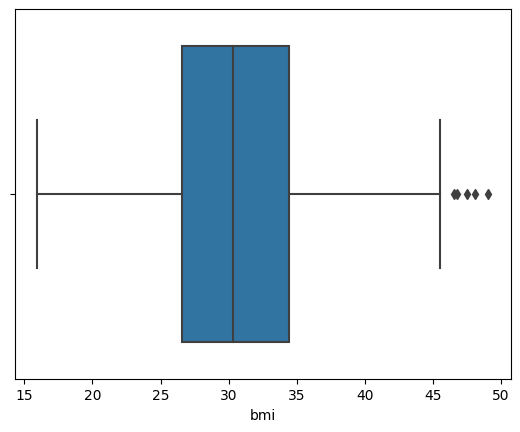

In [19]:
sns.boxplot(x=df['bmi'])

<AxesSubplot:xlabel='children', ylabel='count'>

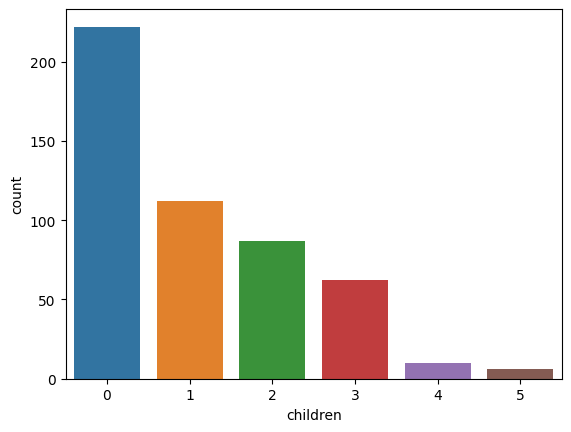

In [20]:
sns.countplot(data=df,x="children")

<AxesSubplot:>

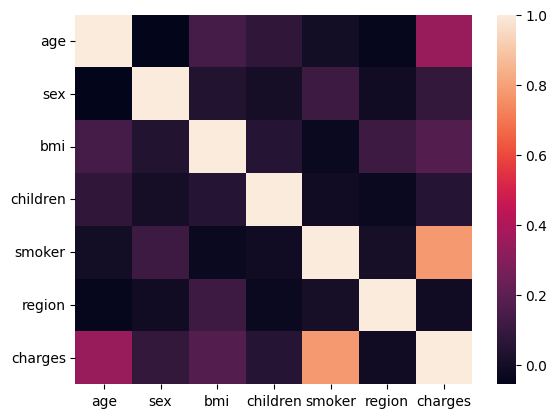

In [21]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='charges', ylabel='Density'>

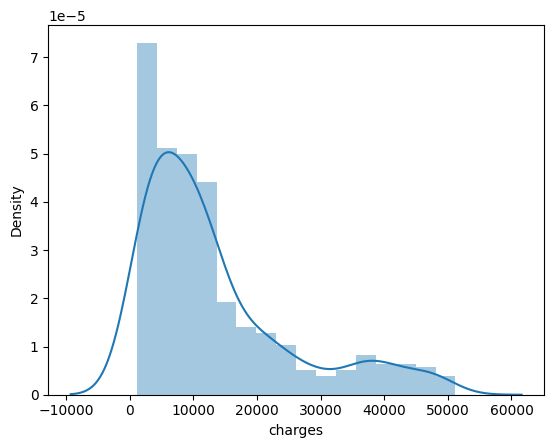

In [22]:
sns.distplot(df["charges"])

<AxesSubplot:xlabel='children', ylabel='age'>

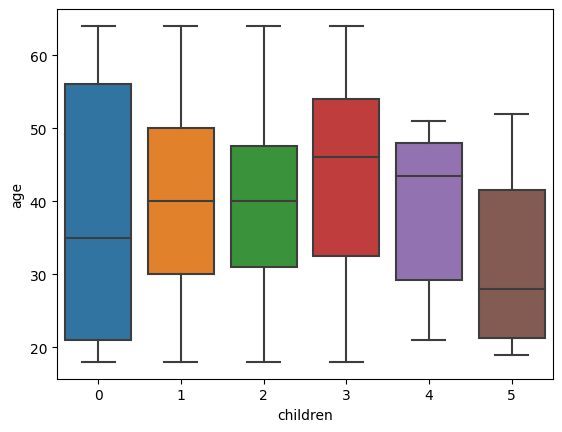

In [23]:
sns.boxplot(x="children",y="age",data=df)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
494,21,1,25.70,4,1,3,17942.1060
495,20,1,27.93,0,0,0,1967.0227
496,31,0,23.60,2,0,3,4931.6470
497,45,1,28.70,2,0,3,8027.9680
498,44,0,23.98,2,0,2,8211.1002


In [26]:
x = df.drop('charges', axis=1)  # Features (excluding the target 'charges')
y = df['charges']  

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [31]:
ypred = model.predict(xtest)

In [32]:
train_accuracy = model.score(xtrain, ytrain)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7557039013956801


In [33]:
model.score(xtrain,ytrain)

0.7557039013956801

In [34]:
model.score(xtest,ypred)

1.0

In [35]:
model.score(xtest, ytest)

0.7316057319001025

In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
sex_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
region_encoder = LabelEncoder()

# Gather user input
age = int(input("Enter your Age: "))
sex = input("Sex: male(1) or female(0): ")
bmi = float(input("Enter the rate of body mass index (BMI): "))
children = int(input("How many children do you have? "))
smoker = input("Do you smkoe?")
region = input("What region are you from? ")

# Transform categorical variables using label encoding
sex_encoded = sex_encoder.fit_transform([sex])[0]  # Get the first element of the transformed array
smoker_encoded = smoker_encoder.fit_transform([smoker])[0]
region_encoded = region_encoder.fit_transform([region])[0]

# Prepare the data for prediction
prepared_data = [[age, sex_encoded, bmi, children, smoker_encoded, region_encoded]]


Enter your Age: 12
Sex: male(1) or female(0): male
Enter the rate of body mass index (BMI): 44
How many children do you have? 2
Do you smkoe?no
What region are you from? southeast


In [37]:
# Now you can pass prepared_data to your model for prediction
yprediction = model.predict(prepared_data)
print("Predicted charges for health insurance:", yprediction)

Predicted charges for health insurance: [6374.44918874]
